In [1]:
import numpy as np
import pytesseract
from PIL import Image
import cv2
from matplotlib import pyplot as plt

# Importing the one of the image files (PNG in this case due to the lossless compression algorithm - we should read directly into Python from PDF though)

image = cv2.imread('../msk_RF1-0.png',cv2.IMREAD_GRAYSCALE)
#image = cv2.imread('../msk_RF1-0.png')

#from pyimagesearch.transform import four_point_transform
from skimage.filters import threshold_local
import numpy as np
import argparse
import imutils

In [2]:
ratio = image.shape[0] / 50.0
orig = image.copy()
image = imutils.resize(image, height=1000)
 
# convert the image to grayscale, blur it, and find edges
# in the image
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(image, (5, 5), 0)
edged = cv2.Canny(gray, 75, 200)
 
# show the original image and the edge detected image
print("STEP 1: Edge Detection")
#cv2.imshow("Image", image)
#cv2.imshow("Edged", edged)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

STEP 1: Edge Detection


In [3]:
from multiprocessing import Pool
from functools import partial
from contextlib import closing


In [4]:
# find the contours in the edged image, keeping only the
# largest ones, and initialize the screen contour
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:5]
 
    
def Operate(j,cnts):
    c=cnts[j]
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    return approx

func = partial(Operate, cnts=cnts)
with closing( Pool(processes = 8, maxtasksperchild=1)) as p:
        cl_map = p.map(func, range(len(cnts)))


In [5]:
# loop over the contours
contours = []
for c in cl_map:
    # approximate the contour 
    # if our approximated contour has four points, then we
    # can assume that we have found our screen
    if len(c) == 4:
        contours+=[c]

In [13]:
contours[0][0][0][0]

52

In [7]:
# show the contour (outline) of the piece of paper
print("STEP 2: Find contours of paper")

#cv2.drawContours(image,contours[0], -1, (0, 255, 0), 2)
#cv2.imshow("Outline", image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

STEP 2: Find contours of paper


In [34]:
splits = (image[:, :contours[0][0][0][0] ],
          image[:,  contours[0][1][0][0]:],
          
residual = image[:, contours[0][0][0][0]:contours[0][1][0][0]]

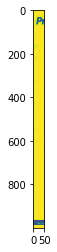

In [35]:
plt.imshow(splits[0])

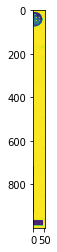

In [36]:
plt.imshow(splits[1])

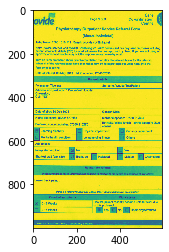

In [37]:
plt.imshow(residual)